# Sanity check
Import the metadata from AR6 runs and check that they vaguely correspond to the values of carbon budget resultant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
startyear = 2022

In [3]:
meta = pd.read_excel("../InputData/AR6_Scenarios_Database_metadata_indicators_v1.0.xlsx", sheet_name="meta")

In [4]:
emissions = pd.read_csv("../InputData/MAGICCAR6emWG3scen/job-20211019-ar6-nonco2_Emissions-CO2.csv")
emissions = emissions[emissions["permafrost"]==True]

In [5]:
meta.columns

Index(['Model', 'Scenario', 'Category', 'Category_name', 'Category_subset',
       'Subset_Ch4', 'Category_Vetting_historical', 'IMP_marker',
       'Literature Reference (if applicable)', 'Policy_category',
       'Policy_category_name', 'Project_study', 'CO2 emissions 2030 Gt CO2/yr',
       'CO2 emissions 2050 Gt CO2/yr', 'CO2 emissions 2100 Gt CO2/yr', 'COVID',
       'GDP|MER-per-capita-in-2100', 'GDP|MER-per-capita-in-2100_bin',
       'GHG emissions 2030 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2050 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2100 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'GHG emissions reductions 2019-2050 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2040 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2050 % modelled Ha

In [6]:
meta.columns = [i.replace("Scenario", "scenario").replace("Model", "model") for i in meta.columns]

In [7]:
target = 1.5
tol = 0.06

In [8]:
# Calculate the naive mean cumulative emissions of scenarios within tolerance in MAGICC and FaIR calculations.

In [9]:
magiccmed = "Median peak warming (MAGICCv7.5.3)"
fairmed = "Median peak warming (FaIRv1.6.2)"
cumco2 = "Cumulative net CO2 (2020 to netzero, Gt CO2) (Harm-Infilled)"
magicc_scen = meta.loc[
    (meta[magiccmed] > target-tol) & (meta[magiccmed] < target+tol), 
    :
]
magicc_scen[cumco2].mean()

504.08157136475074

In [10]:
fair_scen = meta.loc[
    (meta[fairmed] > target-tol) & (meta[fairmed] < target+tol), 
    :
]
fair_scen[cumco2].mean()

561.4600721344582

In [11]:
# Next, consider a linear trend throught this line.

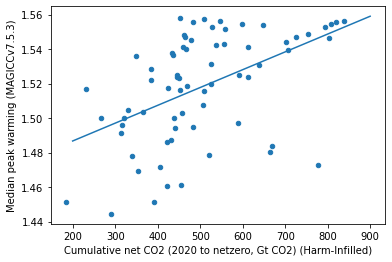

In [12]:
lolim = 200
hilim = 900
magicc_scen.plot(cumco2, magiccmed, kind="scatter")
magmiv, magbiv = np.polyfit(magicc_scen[cumco2], magicc_scen[magiccmed], 1)
plt.plot([lolim, hilim],  [magmiv*lolim+magbiv, magmiv*hilim+magbiv])

In [13]:
# MAGICC budget approximation in this framework
(1.5 - magbiv) / magmiv

328.6004195925833

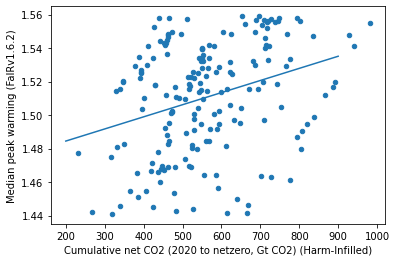

In [14]:
fair_scen.plot(cumco2, fairmed, kind="scatter")
fairmiv, fairbiv = np.polyfit(fair_scen[cumco2], fair_scen[fairmed], 1)
plt.plot([lolim, hilim],  [fairmiv*lolim+fairbiv, fairmiv*hilim+fairbiv])

In [15]:
# Fair budget in this framework
(1.5 - fairbiv) / fairmiv

414.23108423432603

It seems like the sanity check has rather weak force due to the inconsistency across parameterisations, but the paper-reported values plus 2 years of emissions (~80 Gt) are within the range of values from the sanity check. 
# Rigorous check
Now repeat the above analysis with the actual emissions from 2022, using a range of tolerances

In [16]:
emissions[(emissions.loc[:, ["model", "scenario"]]==emissions.loc[:, ["model", "scenario"]].iloc[0])]


,Category,Category_name,Exceedance Probability 1.5C (MAGICCv7.5.3),Exceedance Probability 2.0C (MAGICCv7.5.3),Exceedance Probability 2.5C (MAGICCv7.5.3),Exceedance Probability 3.0C (MAGICCv7.5.3),climate-models,exclude,harmonization,infilling,...,2091-01-01 00:00:00,2092-01-01 00:00:00,2093-01-01 00:00:00,2094-01-01 00:00:00,2095-01-01 00:00:00,2096-01-01 00:00:00,2097-01-01 00:00:00,2098-01-01 00:00:00,2099-01-01 00:00:00,2100-01-01 00:00:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cumemissions = emissions.groupby(["model", "scenario"]).sum().reset_index()
cumemissions

,model,scenario,Exceedance Probability 1.5C (MAGICCv7.5.3),Exceedance Probability 2.0C (MAGICCv7.5.3),Exceedance Probability 2.5C (MAGICCv7.5.3),Exceedance Probability 3.0C (MAGICCv7.5.3),exclude,median peak warming (MAGICCv7.5.3),median warming in 2100 (MAGICCv7.5.3),median year of peak warming (MAGICCv7.5.3),...,2091-01-01 00:00:00,2092-01-01 00:00:00,2093-01-01 00:00:00,2094-01-01 00:00:00,2095-01-01 00:00:00,2096-01-01 00:00:00,2097-01-01 00:00:00,2098-01-01 00:00:00,2099-01-01 00:00:00,2100-01-01 00:00:00
0,AIM/CGE 2.0,SSP1-26,1.490000,0.426667,0.113333,0.013333,0,3.405138,3.219148,4118,...,-88.772663,-138.597038,-188.421413,-238.245789,-288.070164,-337.894539,-387.718914,-437.543289,-487.367665,-537.192040
1,AIM/CGE 2.0,SSP1-34,1.870000,1.153333,0.443333,0.176667,0,4.197647,4.180487,4200,...,10042.934427,9869.591942,9696.249457,9522.906971,9349.564486,9176.222001,9002.879516,8829.537031,8656.194545,8482.852060
2,AIM/CGE 2.0,SSP1-45,1.996667,1.800000,1.223333,0.560000,0,5.333945,5.328847,4200,...,20609.192797,20339.638582,20070.084367,19800.530151,19530.975936,19261.421721,18991.867506,18722.313291,18452.759075,18183.204860
3,AIM/CGE 2.0,SSP1-Baseline,2.000000,1.993333,1.870000,1.463333,0,6.793790,6.793790,4200,...,30773.119541,30611.952853,30450.786164,30289.619475,30128.452786,29967.286097,29806.119408,29644.952720,29483.786031,29322.619342
4,AIM/CGE 2.0,SSP4-26,1.380000,0.300000,0.030000,0.000000,0,3.262512,3.047866,4120,...,-2947.976420,-3049.754031,-3151.531643,-3253.309254,-3355.086866,-3456.864477,-3558.642089,-3660.419700,-3762.197312,-3863.974924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,WITCH-GLOBIOM 4.4,CD-LINKS_NPi,2.000000,2.000000,1.983333,1.813333,0,7.790222,7.790222,4200,...,82997.291472,82660.401371,82323.511271,81986.621170,81649.731069,81312.840968,80975.950868,80639.060767,80302.170666,79965.280565
1198,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1000,0.886667,0.156667,0.013333,0.000000,0,2.945275,2.672934,4120,...,-5744.166938,-5998.982112,-6253.797287,-6508.612461,-6763.427636,-7018.242810,-7273.057985,-7527.873159,-7782.688334,-8037.503508
1199,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1600,1.363333,0.413333,0.116667,0.020000,0,3.346735,3.288115,4164,...,1348.020113,1008.875035,669.729957,330.584879,-8.560199,-347.705277,-686.850355,-1025.995433,-1365.140511,-1704.285589
1200,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_400,0.643333,0.016667,0.000000,0.000000,0,2.810641,2.036519,4072,...,-14365.487177,-14320.692175,-14275.897173,-14231.102170,-14186.307168,-14141.512165,-14096.717163,-14051.922161,-14007.127158,-13962.332156


In [18]:
cumemissions.columns = [a.replace("-01-01 00:00:00", "") for a in cumemissions.columns]
cumemissions

,model,scenario,Exceedance Probability 1.5C (MAGICCv7.5.3),Exceedance Probability 2.0C (MAGICCv7.5.3),Exceedance Probability 2.5C (MAGICCv7.5.3),Exceedance Probability 3.0C (MAGICCv7.5.3),exclude,median peak warming (MAGICCv7.5.3),median warming in 2100 (MAGICCv7.5.3),median year of peak warming (MAGICCv7.5.3),...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,AIM/CGE 2.0,SSP1-26,1.490000,0.426667,0.113333,0.013333,0,3.405138,3.219148,4118,...,-88.772663,-138.597038,-188.421413,-238.245789,-288.070164,-337.894539,-387.718914,-437.543289,-487.367665,-537.192040
1,AIM/CGE 2.0,SSP1-34,1.870000,1.153333,0.443333,0.176667,0,4.197647,4.180487,4200,...,10042.934427,9869.591942,9696.249457,9522.906971,9349.564486,9176.222001,9002.879516,8829.537031,8656.194545,8482.852060
2,AIM/CGE 2.0,SSP1-45,1.996667,1.800000,1.223333,0.560000,0,5.333945,5.328847,4200,...,20609.192797,20339.638582,20070.084367,19800.530151,19530.975936,19261.421721,18991.867506,18722.313291,18452.759075,18183.204860
3,AIM/CGE 2.0,SSP1-Baseline,2.000000,1.993333,1.870000,1.463333,0,6.793790,6.793790,4200,...,30773.119541,30611.952853,30450.786164,30289.619475,30128.452786,29967.286097,29806.119408,29644.952720,29483.786031,29322.619342
4,AIM/CGE 2.0,SSP4-26,1.380000,0.300000,0.030000,0.000000,0,3.262512,3.047866,4120,...,-2947.976420,-3049.754031,-3151.531643,-3253.309254,-3355.086866,-3456.864477,-3558.642089,-3660.419700,-3762.197312,-3863.974924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,WITCH-GLOBIOM 4.4,CD-LINKS_NPi,2.000000,2.000000,1.983333,1.813333,0,7.790222,7.790222,4200,...,82997.291472,82660.401371,82323.511271,81986.621170,81649.731069,81312.840968,80975.950868,80639.060767,80302.170666,79965.280565
1198,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1000,0.886667,0.156667,0.013333,0.000000,0,2.945275,2.672934,4120,...,-5744.166938,-5998.982112,-6253.797287,-6508.612461,-6763.427636,-7018.242810,-7273.057985,-7527.873159,-7782.688334,-8037.503508
1199,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1600,1.363333,0.413333,0.116667,0.020000,0,3.346735,3.288115,4164,...,1348.020113,1008.875035,669.729957,330.584879,-8.560199,-347.705277,-686.850355,-1025.995433,-1365.140511,-1704.285589
1200,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_400,0.643333,0.016667,0.000000,0.000000,0,2.810641,2.036519,4072,...,-14365.487177,-14320.692175,-14275.897173,-14231.102170,-14186.307168,-14141.512165,-14096.717163,-14051.922161,-14007.127158,-13962.332156


In [19]:
yearcols = [str(x) for x in np.arange(startyear, 2101)]

In [20]:
metace = pd.merge(meta, cumemissions, on=["model", "scenario"])
metace

,model,scenario,Category,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,AIM/CGE 2.0,SSP1-26,C3,C3: limit warming to 2°C (>67%),C3a_Immediate_Action,NaN,C3,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,-88.772663,-138.597038,-188.421413,-238.245789,-288.070164,-337.894539,-387.718914,-437.543289,-487.367665,-537.192040
1,AIM/CGE 2.0,SSP1-34,C5,C5: limit warming to 2.5°C (>50%),C5,NaN,C5,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,10042.934427,9869.591942,9696.249457,9522.906971,9349.564486,9176.222001,9002.879516,8829.537031,8656.194545,8482.852060
2,AIM/CGE 2.0,SSP1-45,C6,C6: limit warming to 3°C (>50%),C6,NaN,C6,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,20609.192797,20339.638582,20070.084367,19800.530151,19530.975936,19261.421721,18991.867506,18722.313291,18452.759075,18183.204860
3,AIM/CGE 2.0,SSP1-Baseline,C7,C7: limit warming to 4°C (>50%),C7,NaN,C7,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P1a,...,30773.119541,30611.952853,30450.786164,30289.619475,30128.452786,29967.286097,29806.119408,29644.952720,29483.786031,29322.619342
4,AIM/CGE 2.0,SSP4-26,C3,C3: limit warming to 2°C (>67%),C3a_Immediate_Action,NaN,C3,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,-2947.976420,-3049.754031,-3151.531643,-3253.309254,-3355.086866,-3456.864477,-3558.642089,-3660.419700,-3762.197312,-3863.974924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,WITCH-GLOBIOM 4.4,CD-LINKS_NPi,C7,C7: limit warming to 4°C (>50%),C7,NaN,C7,NaN,https://doi.org/10.1007/s10584-020-02837-9,P1b,...,82997.291472,82660.401371,82323.511271,81986.621170,81649.731069,81312.840968,80975.950868,80639.060767,80302.170666,79965.280565
1198,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1000,C1,C1: limit warming to 1.5°C (>50%) with no or l...,C1a_NZGHGs,NaN,C1,NaN,https://doi.org/10.1038/s41560-018-0179-z; htt...,P2a,...,-5744.166938,-5998.982112,-6253.797287,-6508.612461,-6763.427636,-7018.242810,-7273.057985,-7527.873159,-7782.688334,-8037.503508
1199,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1600,C3,C3: limit warming to 2°C (>67%),C3a_Immediate_Action,NaN,C3,NaN,https://doi.org/10.1038/s41560-018-0179-z; htt...,P2a,...,1348.020113,1008.875035,669.729957,330.584879,-8.560199,-347.705277,-686.850355,-1025.995433,-1365.140511,-1704.285589
1200,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_400,C1,C1: limit warming to 1.5°C (>50%) with no or l...,C1a_NZGHGs,NaN,C1,NaN,https://doi.org/10.1038/s41560-018-0179-z; htt...,P2a,...,-14365.487177,-14320.692175,-14275.897173,-14231.102170,-14186.307168,-14141.512165,-14096.717163,-14051.922161,-14007.127158,-13962.332156


In [21]:
cumname = f"CumulativeCO2From{startyear}"
metace[cumname] = (metace[yearcols] * np.cumprod(metace[yearcols] > 0, axis=1)).sum(axis=1) / 1000
metace[cumname]

0        871.507756
1       1699.661114
2       2399.648262
3       2915.654606
4        897.901851
           ...     
1197    5474.158074
1198     694.769313
1199    1188.839808
1200     392.677121
1201    5580.876058
Name: CumulativeCO2From2022, Length: 1202, dtype: float64

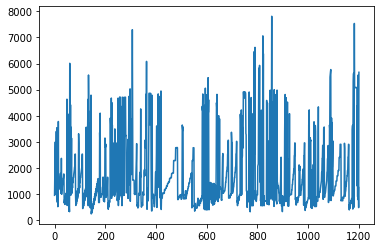

In [22]:
plt.plot(metace[cumco2]-metace[cumname]/1000)

In [23]:
meta

,model,scenario,Category,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category,...,Median year of peak warming (FaIRv1.6.2),Exceedance Probability 1.5C (MAGICCv7.5.3),Exceedance Probability 1.5C (FaIRv1.6.2),Exceedance Probability 2.0C (MAGICCv7.5.3),Exceedance Probability 2.0C (FaIRv1.6.2),Exceedance Probability 3.0C (MAGICCv7.5.3),Exceedance Probability 3.0C (FaIRv1.6.2),IMP_color_rgb,IMP_color_hex,Category_color_rgb
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,NaN,NaN,C1a_NZGHGs,NaN,failed_Vetting_historical_C1,NaN,https://doi.org/10.1038/s41558-018-0198-6,P2a,...,2037.0,0.480000,0.332588,0.040000,0.009388,0.000000,0.000000,NaN,NaN,"151, 206, 228"
1,AIM/CGE 2.0,ADVANCE_2020_Med2C,NaN,NaN,C4,NaN,failed_Vetting_historical_C4,NaN,https://doi.org/10.1038/s41558-018-0198-6,P2a,...,2100.0,0.826667,0.820742,0.343333,0.260170,0.013333,0.004023,NaN,NaN,"167, 198, 130"
2,AIM/CGE 2.0,ADVANCE_2020_WB2C,NaN,NaN,C1b_+veGHGs,NaN,failed_Vetting_historical_C1,NaN,https://doi.org/10.1038/s41558-018-0198-6,P2a,...,2050.0,0.538333,0.426017,0.091667,0.035762,0.000000,0.000447,NaN,NaN,"151, 206, 228"
3,AIM/CGE 2.0,ADVANCE_2030_Med2C,NaN,NaN,C4,NaN,failed_Vetting_historical_C4,NaN,https://doi.org/10.1038/s41558-018-0198-6,P3b,...,2100.0,0.910000,0.907912,0.470000,0.374162,0.033333,0.008494,NaN,NaN,"167, 198, 130"
4,AIM/CGE 2.0,ADVANCE_2030_Price1.5C,NaN,NaN,C2,NaN,failed_Vetting_historical_C2,NaN,https://doi.org/10.1038/s41558-018-0198-6,P3b,...,2039.0,0.788333,0.646401,0.163333,0.071524,0.000000,0.000447,NaN,NaN,"119, 134, 99"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,WEGDYN 1.0,WEO_NDCplus_ASIA,NaN,NaN,NaN,NaN,no-climate-assessment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2300,WEGDYN 1.0,WEO_NDCplus_EUR_CHN,NaN,NaN,NaN,NaN,no-climate-assessment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2301,WEGDYN 1.0,WEO_NDCplus_GLOBAL,NaN,NaN,NaN,NaN,no-climate-assessment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2302,WEGDYN 1.0,WEO_NDCplus_PARTIAL,NaN,NaN,NaN,NaN,no-climate-assessment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
fair_results = {}
magicc_results = {}
for tol in np.arange(0.01, 0.11, 0.003):
    fair_scen = metace.loc[
        (metace[fairmed] > target-tol) & (metace[fairmed] < target+tol), :
    ]
    fairmiv, fairbiv = np.polyfit(fair_scen[cumname], fair_scen[fairmed], 1)
    fair_results[tol] = (1.5 - fairbiv) / fairmiv
    magicc_scen = metace.loc[
        (metace[magiccmed] > target-tol) & (metace[magiccmed] < target+tol), :
    ]
    magiccmiv, magiccbiv = np.polyfit(magicc_scen[cumname], magicc_scen[magiccmed], 1)
    magicc_results[tol] = (1.5 - magiccbiv) / magiccmiv

In [25]:
metamagicc = meta.loc[(meta[magiccmed] > target-tol) & (meta[magiccmed] < target+tol), :]


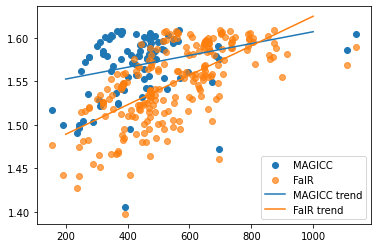

In [26]:
plt.scatter(magicc_scen[cumname], magicc_scen[magiccmed], label="MAGICC")
plt.scatter(fair_scen[cumname], fair_scen[fairmed], label="FaIR", alpha=0.7)
#plt.scatter(metamagicc[cumco2], metamagicc[magiccmed], alpha=0.3)
x = [200, 1000]
plt.plot(x, [magiccbiv + xi * magiccmiv for xi in x], label="MAGICC trend")
plt.plot(x, [fairbiv + xi * fairmiv for xi in x], label="FaIR trend")
plt.legend()
plt.savefig(f"../output/pureEmulatorWorkings_{target}.png")

(1.3, 2.0)

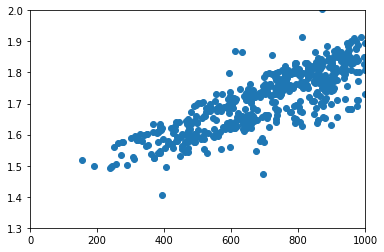

In [27]:
plt.scatter(metace[cumname], metace[magiccmed])
plt.xlim([0, 1000])
plt.ylim([1.3, 2.0])

In [28]:
fair_results.values()

dict_values([439.85477342873264, 627.007388570802, 886.3953811718122, 248.78091401153424, 1576.0352116628617, 249.81784482663048, -7.3060353478896305, 116.21164001992868, 263.8313787624309, 262.5820460354723, 203.69471493158076, 180.29691214533528, 168.863166056858, 187.37991128447064, 184.98410902725675, 204.27635654041808, 267.2949898986597, 268.536015301047, 265.6857369050576, 255.82739503221043, 243.1441981490218, 258.6513140814441, 253.3016065885137, 254.61478632809133, 255.88692774803107, 255.45197620612697, 259.3061658985203, 254.62066090260407, 255.88727497145334, 256.0760852499952, 257.67473390164133, 269.1527367366116, 267.26465683169204, 264.1021857355816])

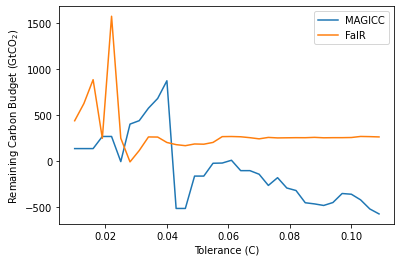

In [29]:
plt.plot(magicc_results.keys(), magicc_results.values(), label="MAGICC")
plt.plot(fair_results.keys(), fair_results.values(), label="FaIR")
plt.xlabel("Tolerance (C)")
plt.ylabel("Remaining Carbon Budget (GtCO$_2$)")
plt.legend()
plt.savefig(f"../output/PureEmulatorBudgetCalc_{target}C.png")

In [30]:
target=2
fair_results = {}
magicc_results = {}
for tol in np.arange(0.01, 0.11, 0.003):
    fair_scen = metace.loc[
        (metace[fairmed] > target-tol) & (metace[fairmed] < target+tol), :
    ]
    fairmiv, fairbiv = np.polyfit(fair_scen[cumname], fair_scen[fairmed], 1)
    fair_results[tol] = (target - fairbiv) / fairmiv
    magicc_scen = metace.loc[
        (metace[magiccmed] > target-tol) & (metace[magiccmed] < target+tol), :
    ]
    magiccmiv, magiccbiv = np.polyfit(magicc_scen[cumname], magicc_scen[magiccmed], 1)
    magicc_results[tol] = (target - magiccbiv) / magiccmiv

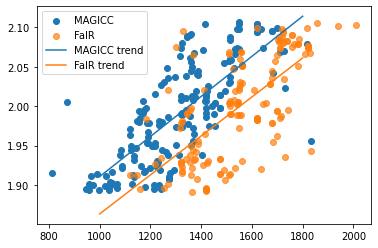

In [31]:
plt.scatter(magicc_scen[cumname], magicc_scen[magiccmed], label="MAGICC")
plt.scatter(fair_scen[cumname], fair_scen[fairmed], label="FaIR", alpha=0.7)
#plt.scatter(metamagicc[cumco2], metamagicc[magiccmed], alpha=0.3)
x = [1000, 1800]
plt.plot(x, [magiccbiv + xi * magiccmiv for xi in x], label="MAGICC trend")
plt.plot(x, [fairbiv + xi * fairmiv for xi in x], label="FaIR trend")
plt.legend()
plt.savefig(f"../output/pureEmulatorWorkings_{target}C.png")

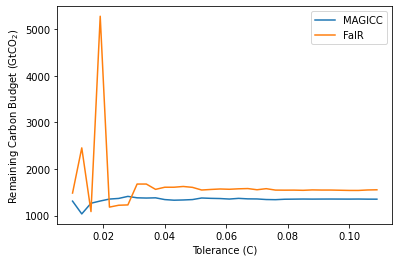

In [32]:
plt.plot(magicc_results.keys(), magicc_results.values(), label="MAGICC")
plt.plot(fair_results.keys(), fair_results.values(), label="FaIR")
plt.xlabel("Tolerance (C)")
plt.ylabel("Remaining Carbon Budget (GtCO$_2$)")
plt.legend()
plt.savefig(f"../output/PureEmulatorBudgetCalc_{target}C.png")

In [33]:
fair_results.values()

dict_values([1482.7055393650992, 2453.4886639152046, 1084.918518724381, 5282.284876761163, 1180.8350309003104, 1220.7831999158043, 1227.9866911516544, 1676.4002920756745, 1676.4002920756745, 1562.1713098923299, 1607.9838091720433, 1607.9838091720433, 1624.3184728260442, 1605.3736975222275, 1548.1707798143664, 1560.2282823452158, 1570.2151146876313, 1564.0177364399017, 1573.968455197044, 1579.415009937907, 1553.8228869538134, 1577.0004128997562, 1546.5108513455111, 1544.9648339487449, 1545.887612865787, 1541.7030221183181, 1550.3857489821137, 1547.2263457516453, 1547.3729119697448, 1543.3234496920882, 1539.2651391653512, 1539.0231393538327, 1549.156580595036, 1552.8827717003842])